In [9]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp

In [11]:
#read the file
df = pd.read_csv("C:/Users/bithi/OneDrive/Documents/Docz/Interview/HireArt - Data Analyst Exercise 10.12.17 - Sheet1.csv")
df.head(5)

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25


In [14]:
#checking the datatype
df.dtypes

Account manager    object
Client Name        object
Date of Contact    object
dtype: object

In [15]:
#checking for missing values
df.isnull().sum()

Account manager    0
Client Name        0
Date of Contact    0
dtype: int64

In [16]:
#splitting 'Date of Contact' column in Month, date and year

df['Year'], df['Month'], df['Day'] = zip(*df['Date of Contact'].map(lambda x: x.split('-')))
df.head()

,Account manager,Client Name,Date of Contact,Year,Month,Day
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015,10,31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013,12,15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013,12,07
3,Milan Crona,Armstrong Group,2013-11-02,2013,11,02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013,12,25


In [17]:
#data is of 5 years and maximum appearing for 2014

df.describe()

,Account manager,Client Name,Date of Contact,Year,Month,Day
count,1001,1001,1001,1001,1001,1001
unique,4,35,704,5,12,31
top,Milan Crona,Eichmann and Sons,2013-10-11,2014,10,19
freq,286,38,7,264,213,44


In [24]:
# calculating count of clients contacted per Month (highest for October with 213 count)

df_month= df.groupby(['Month'])['Client Name'].count().reset_index(name='Number of Clients')
df_month.index= df_month.Month
data=df_month.drop(['Month'], axis=1)
data

,Number of Clients
Month,
01,60
02,64
03,58
04,52
05,69
06,77
07,66
08,79
09,121


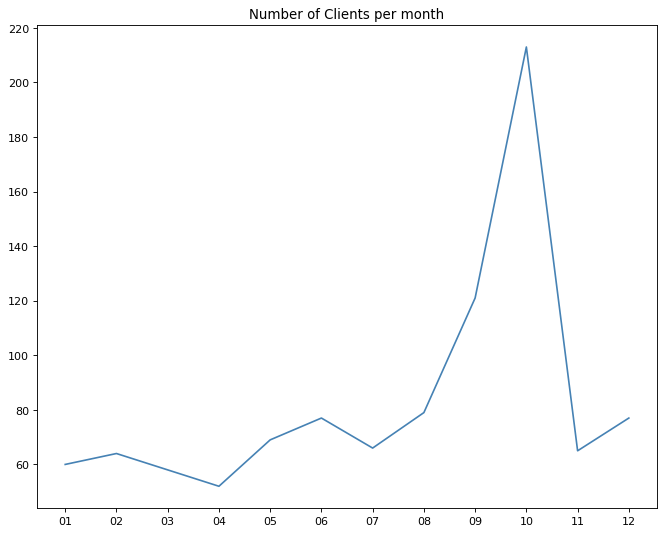

In [25]:
# plot showing month 10 (October) has highest number of clients

from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data['Number of Clients'], label='Number of Clients', color='steelblue')
plt.title('Number of Clients per month')
plt.show()

In [26]:
#calculating count of clients contacted per Year- October 2013 has highest

df_month_year = df.groupby(['Month','Year'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
df_month_year

,Month,Year,Number of Clients
36,10,2013,60
37,10,2014,58
38,10,2015,53
39,10,2016,42
32,09,2014,33
35,09,2017,31
33,09,2015,29
34,09,2016,28
28,08,2014,25
20,06,2014,23


In [28]:
#  finding maximum unique clients contacted in each month- since it is a possibily that one client has contacted multiple times

df_unique_client=df.groupby(['Month','Year','Client Name'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
df_unique_client

,Month,Year,Client Name,Number of Clients
588,10,2015,"Wyman, Farrell and Haag",7
507,10,2013,Donnelly-Champlin,6
540,10,2014,Eichmann and Sons,5
538,10,2014,"Denesik, Stehr and Carter",5
519,10,2013,"Kuhic, Stark and Kreiger",4
561,10,2015,Abbott Group,4
525,10,2013,Ondricka-Wolff,4
504,10,2013,"Brown, Wyman and Grimes",4
463,09,2016,"Anderson, Kutch and Hyatt",4
600,10,2016,"Hermiston, Armstrong and Balistreri",4


In [45]:
#
df_unique_client= df.groupby(['Month'])[('Client Name')].nunique().reset_index(name='Unique Client Count')
df_unique_client

,Month,Unique Client Count
0,01,30
1,02,31
2,03,29
3,04,26
4,05,33
5,06,34
6,07,28
7,08,33
8,09,33
9,10,35


In [46]:
#calculating the percentage for number of unique clients per month

def perc_contact_clients():
    no_unique_clients_total = df['Client Name'].nunique()
    df_month = df.groupby('Month')
    no_of_clients = df_month['Client Name'].nunique()
    perc = (no_of_clients/no_unique_clients_total) * 100
    my_dict = {}
    j =0
    for i in df_month:
        my_dict[i[0]]=perc[j]
        j = j+1
    maximum = max(my_dict, key=my_dict.get)  
    print("The month to contact the most clients: \n",maximum)
    print(round(perc))

In [47]:
perc_contact_clients()

The month to contact the most clients: 
 10
Month
01     86.0
02     89.0
03     83.0
04     74.0
05     94.0
06     97.0
07     80.0
08     94.0
09     94.0
10    100.0
11     86.0
12     91.0
Name: Client Name, dtype: float64


In [48]:
df_unique_client.index= df_unique_client.Month
data_unique=df_unique_client.drop(['Month'], axis=1)
data_unique

,Unique Client Count
Month,
01,30
02,31
03,29
04,26
05,33
06,34
07,28
08,33
09,33


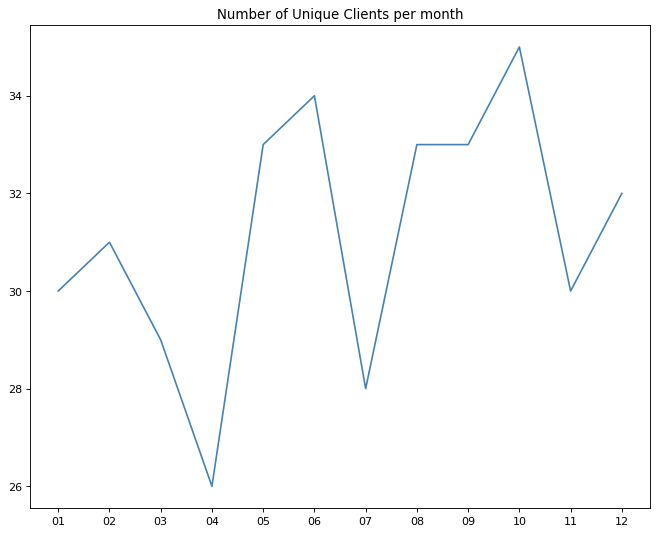

In [49]:
#plot showing Number of unique clients per month : Oct has highest with 35 count

from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_unique['Unique Client Count'], label='Unique Number of Clients', color='steelblue')
plt.title('Number of Unique Clients per month')
plt.show()